Импорт необходимых библиотек

In [10]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

Загрузка данных и препроцессинг - преоброзование в числовой формат

In [11]:
def processData():
    df = pd.read_csv("data.csv")

    df = df.dropna(axis=1, how='all')

    df[df.select_dtypes('object').columns] = df.select_dtypes('object').fillna('unknown')

    le = preprocessing.LabelEncoder()
    df[df.select_dtypes('object').columns] = df.select_dtypes('object').apply(lambda x: le.fit_transform(x.astype(str)))

    df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna('unknown'))

    return df

Разбиение данных на тестовые и тренировочные.

In [12]:
def splitData(df):
    X = df.drop(columns=['def'])
    y = df['def']

    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

Обучение модели логистической регрессии

In [13]:
def trainModel(X_train, y_train):
    lr = LogisticRegression(max_iter=2000)
    lr.fit(X_train, y_train)

    return lr

Подбор необходимых уровней default_rates, approval_rates, thresholds

In [14]:
def computeDefaultRateAndThreshold(lr, X_test):
    y_pred_proba = lr.predict_proba(X_test)[:, 1]

    thresholds = np.linspace(0,1,100)
    default_rates = []
    approval_rates = []

    for thr in thresholds:
        y_pred = np.where(y_pred_proba > thr, 1, 0)
        default_rate = np.mean(y_pred)
        default_rates.append(default_rate)
        approval_rates.append(1 - default_rate)
        if default_rate <= 0.035:
            print(f"Threshold of {thr:.2f} gives a default rate of {default_rate:.2f} and approval rate of {1-default_rate:.2f}")
            break

    return default_rates, approval_rates, thresholds[:len(default_rates)]

Графики

In [15]:
def plotResults(approval_rates, thresholds):
    plt.plot(thresholds, approval_rates)
    plt.xlabel('Threshold')
    plt.ylabel('Approval Rate')
    plt.title('Approval Rate vs. Threshold')
    plt.grid(True)
    plt.show()

Запуск скрипта

Threshold of 0.21 gives a default rate of 0.03 and approval rate of 0.97


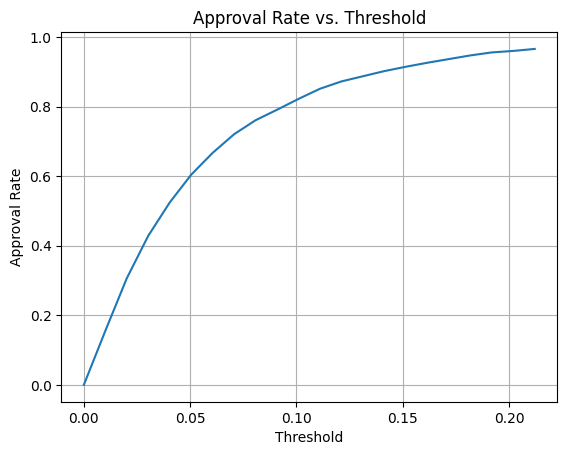

In [16]:
df = processData()
X_train, X_test, y_train, y_test = splitData(df)
model = trainModel(X_train, y_train)
default_rates, approval_rates, thresholds = computeDefaultRateAndThreshold(model, X_test)
plotResults(approval_rates, thresholds)